In [15]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
from sklearn import preprocessing
from sklearn.preprocessing import Imputer, LabelEncoder
from sklearn.linear_model import LogisticRegression


### Read the Input JIRA Defect Log

In [2]:
df = pd.read_csv('./Defect Logs/Data/Defect Data Master.csv',encoding='latin1')

### EDA to see the category distribution

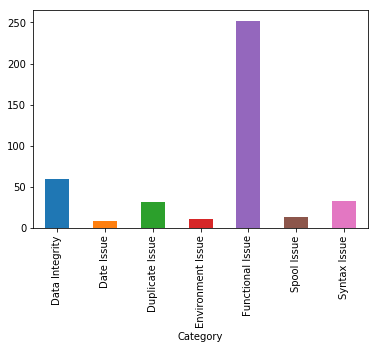

In [3]:
df.groupby('Category').Summary.count().plot.bar(ylim=0)
plt.show()

## Data Cleaning

In [4]:
defect_df = df[['Project','Key','Summary','Assignee','Reporter','Description','Root Cause Selection','IT Team','Sprint','Epic Link','Severity','Root Cause','Category']]

In [5]:
defect_df

,Project,Key,Summary,Assignee,Reporter,Description,Root Cause Selection,IT Team,Sprint,Epic Link,Severity,Root Cause,Category
0,PYM_INN,PYM_INN-54582,PYM_INN 49538 - Filter control process in not ...,"Ektare, Chinmay","Upadhyay, Rohit",Filter control process in not executing the Te...,NaN,Provider Pairing Development,PYM_INN Provider Pairing Sprint 29,PYM_INN Provider Pairing Technical Debt,High,NaN,Environment Issue
1,PYM_INN,PYM_INN-54405,PGT NR1 - NR1 Provider_Preference is not updat...,"Sasikanth, Mahesh","Upadhyay, Rohit",NR1 Provider_Preference is not updated in WORK...,NaN,Provider Pairing Development,"PYM_INN Provider Pairing Sprint 28, PYM_INN Pr...",NaN,Medium,NaN,Data Integrity
2,PYM_INN,PYM_INN-54378,PYM_INN-154 value of ATRBN spans not matching ...,"Gangrade, Akrati","Guglani, Dheeraj",Value of ATRBN SPANS in RULE_EVAL_PP after the...,Data Configuration Error - Incorrect test data...,Provider Pairing Development,NaN,NaN,Medium,Data Configuration Error,Data Integrity
3,PYM_INN,PYM_INN-53753,PYM_INN-154 value of Cummulative fail count no...,"Gangrade, Akrati","Guglani, Dheeraj",When for a member value of Freeze period is fa...,Code Error - Application code differs from sta...,Provider Pairing Development,PYM_INN Provider Pairing Sprint 28,NaN,Medium,Code Error,Functional Issue
4,PYM_INN,PYM_INN-53728,PYM_INN 3551: VBR TIN-NPI substitution rule is...,"Upadhyay, Rohit","Upadhyay, Rohit",VBR TIN-NPI substitution rule is failing,Code Error - Code Conflict in Environment,Provider Pairing Development,PYM_INN Provider Pairing Sprint 28,NaN,Medium,Code Error,Syntax Issue
5,PYM_INN,PYM_INN-53708,"Essentials - Medicare - NM member months gone,...",Unassigned,"Castillo, Alain","Essentials - Medicare - NM member months gone,...",NaN,Provider Pairing Development,NaN,HCT Essentials: Member Month Process,Medium,NaN,Data Integrity
6,PYM_INN,PYM_INN-53604,PYM_INN-154 Measurement Period Derivation BUS ...,"Gangrade, Akrati","Guglani, Dheeraj",Measurement Period Derivation BUS rule failing...,NaN,Provider Pairing Development,NaN,NaN,Medium,NaN,Syntax Issue
7,PYM_INN,PYM_INN-53603,PYM_INN-154 Measurement Period Derivation BUS ...,"Gangrade, Akrati","Guglani, Dheeraj",Measurement Period Derivation BUS rule failing...,Code Error - Code Conflict in Environment,Provider Pairing Development,PYM_INN Provider Pairing Sprint 28,NaN,Medium,Code Error,Syntax Issue
8,PYM_INN,PYM_INN-53589,Filter Control Job failed in Funding Exclusion...,"Ayinala, Deepthi","Kuppannagari, Srikanth",Filter Control Job failed in Funding Exclusion...,Code Error - Code Conflict in Environment,Provider Pairing Development,PYM_INN Provider Pairing Sprint 28,NaN,High,Code Error,Syntax Issue
9,PYM_INN,PYM_INN-53572,PYM_INN 3551: Non Rank 1 Provider_Preference i...,"Upadhyay, Rohit","Upadhyay, Rohit",Non Rank 1 Provider_Preference is not updated ...,Code Error - Application code differs from sta...,Provider Pairing Development,PYM_INN Provider Pairing Sprint 28,NaN,High,Code Error,Data Integrity


In [7]:
stemmer = PorterStemmer()
words = stopwords.words("english")
defect_df['cleaned_summary'] = defect_df['Summary'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
defect_df['cleaned_desc'] = defect_df['Description'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())


c:\users\rupadhyay\python 3.6\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\rupadhyay\python 3.6\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [8]:
defect_df_text = defect_df[['Key','cleaned_summary','cleaned_desc','Category']]

In [10]:
cvec = CountVectorizer()
X = defect_df_text['cleaned_summary']
y = defect_df_text['Category']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [11]:
cvec = CountVectorizer(stop_words='english').fit(X_train)
df_train = pd.DataFrame(cvec.transform(X_train).todense(),columns=cvec.get_feature_names())

In [12]:
df_test = pd.DataFrame(cvec.transform(X_test).todense(),columns=cvec.get_feature_names())

In [13]:
X = defect_df_text['cleaned_desc']
y = defect_df_text['Category']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
cvec = CountVectorizer(stop_words='english').fit(X_train)
df2_train = pd.DataFrame(cvec.transform(X_train).todense(),columns=cvec.get_feature_names())
df2_test = pd.DataFrame(cvec.transform(X_test).todense(),columns=cvec.get_feature_names())

In [14]:
train = pd.concat([df_train,df2_train],axis=1)
test = pd.concat([df_test,df2_test],axis=1)

### Logistic Regression

In [16]:
lr = LogisticRegression()
lr.fit(train,y_train)
lr.score(test,y_test)

0.6372549019607843

### Random Forest Classifier

In [17]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)  
classifier.fit(train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
ytest = np.array(y_test)

In [28]:
classifier.score(test,y_test)

0.696078431372549